In [1]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

 #Útil en:

#Comparaciones de variables en análisis de datos, creación de combinaciones para modelos, evaluación de correlaciones entre pares de variables
#------------------------------------------------------------------------

from itertools import combinations

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")



# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------

import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest




# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("files/masculinity-survey.csv",index_col=0) 
df.sample(10)


,Unnamed: 1,Adult Men,Age,Unnamed: 4,Unnamed: 5,Race,Unnamed: 7,Children,Unnamed: 9,Sexual Orientation,Unnamed: 11
AMONG ADULT MEN,,,,,,,,,,,
NaN,No,39%,29%,42%,47%,41%,35%,44%,34%,41%,19%
NaN,Managers want to hire and promote women,18%,NaN,15%,18%,17%,21%,20%,17%,19%,NaN
NaN,Reached out to the victim to offer support,7%,NaN,7%,9%,9%,5%,9%,6%,7%,NaN
NaN,Rarely,23%,13%,25%,35%,28%,14%,26%,20%,25%,14%
NaN,None of the above,59%,NaN,68%,50%,61%,57%,63%,55%,61%,NaN
NaN,"Never, and not open to it",50%,43%,50%,64%,52%,47%,49%,52%,50%,61%
Work out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Never witnessed sexual harassment,75%,NaN,76%,81%,76%,73%,79%,69%,76%,NaN
NaN,Your physique,33%,40%,34%,23%,35%,31%,28%,40%,31%,58%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, nan to nan
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 1          195 non-null    object
 1   Adult Men           189 non-null    object
 2   Age                 155 non-null    object
 3   Unnamed: 4          190 non-null    object
 4   Unnamed: 5          190 non-null    object
 5   Race                190 non-null    object
 6   Unnamed: 7          190 non-null    object
 7   Children            190 non-null    object
 8   Unnamed: 9          190 non-null    object
 9   Sexual Orientation  190 non-null    object
 10  Unnamed: 11         155 non-null    object
dtypes: object(11)
memory usage: 21.8+ KB


In [15]:
df1 = pd.read_csv("files/raw-responses.csv",index_col=0) 
df1.head(5)

,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011,q0008_0001,q0008_0002,q0008_0003,q0008_0004,q0008_0005,q0008_0006,q0008_0007,q0008_0008,q0008_0009,q0008_0010,q0008_0011,q0008_0012,q0009,q0010_0001,q0010_0002,q0010_0003,q0010_0004,q0010_0005,q0010_0006,q0010_0007,q0010_0008,q0011_0001,q0011_0002,q0011_0003,q0011_0004,q0011_0005,q0012_0001,q0012_0002,q0012_0003,q0012_0004,q0012_0005,q0012_0006,q0012_0007,q0013,q0014,q0015,q0017,q0018,q0019_0001,q0019_0002,q0019_0003,q0019_0004,q0019_0005,q0019_0006,q0019_0007,q0020_0001,q0020_0002,q0020_0003,q0020_0004,q0020_0005,q0020_0006,q0021_0001,q0021_0002,q0021_0003,q0021_0004,q0022,q0024,q0025_0001,q0025_0002,q0025_0003,q0026,q0028,q0029,q0030,q0034,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer,Not selected,Your weight,Not selected,Not selected,Not selected,Not selected,Not selected,Your mental health,Your physical health,Not selected,Not selected,Not selected,Not employed-retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),Not selected,Not selected,Not selected,None of the above,No,Widowed,Not selected,"Yes, one or more children 18 or older",Not selected,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,Not selected,Not selected,Not selected,"Employed, working full-time",Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,None of the above,Not selected,Managers want to hire and promote women,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),NaN,A lot,No,Yes,So

In [5]:
df1["educ4"].value_counts()

educ4
College or more         515
Post graduate degree    482
Some college            440
High school or less     178
Name: count, dtype: int64

##### Cambiar nombre de columnas

In [16]:
rename_dict = {
    "StartDate": "start_date",
    "EndDate": "end_date",
    "q0001": "self_perceived_masculinity",
    "q0002": "importance_of_being_seen_as_masculine",
    
    # Q4: Sources of masculinity (multirespuesta)
    "q0004_0001": "source_of_masculinity_father_figure",
    "q0004_0002": "source_of_masculinity_mother_figure",
    "q0004_0003": "source_of_masculinity_family_members",
    "q0004_0004": "source_of_masculinity_pop_culture",
    "q0004_0005": "source_of_masculinity_friends",
    "q0004_0006": "source_of_masculinity_other",

    "q0005": "societal_pressure_on_men",

    # Q7: Lifestyle frequency (multirespuesta)
    "q0007_0001": "lifestyle_ask_friend_professional_advice",
    "q0007_0002": "lifestyle_ask_friend_personal_advice",
    "q0007_0003": "lifestyle_show_affection_to_male_friends",
    "q0007_0004": "lifestyle_crying",
    "q0007_0005": "lifestyle_physical_fight",
    "q0007_0006": "lifestyle_sexual_relations_with_women",
    "q0007_0007": "lifestyle_sexual_relations_with_men",
    "q0007_0008": "lifestyle_watch_sports",
    "q0007_0009": "lifestyle_work_out",
    "q0007_0010": "lifestyle_see_therapist",
    "q0007_0011": "lifestyle_feel_lonely_or_isolated",

    # Q8: Daily worries (multirespuesta)
    "q0008_0001": "daily_worry_height",
    "q0008_0002": "daily_worry_weight",
    "q0008_0003": "daily_worry_hair",
    "q0008_0004": "daily_worry_physique",
    "q0008_0005": "daily_worry_genitalia",
    "q0008_0006": "daily_worry_clothing_style",
    "q0008_0007": "daily_worry_sexual_performance",
    "q0008_0008": "daily_worry_mental_health",
    "q0008_0009": "daily_worry_physical_health",
    "q0008_0010": "daily_worry_finances",
    "q0008_0011": "daily_worry_provide_for_family",
    "q0008_0012": "daily_worry_none",

    "q0009": "employment_status",

    # Q10: Advantages of being a man at work (multirespuesta)
    "q0010_0001": "advantage_of_being_a_man_more_money",
    "q0010_0002": "advantage_of_being_a_man_taken_more_seriously",
    "q0010_0003": "advantage_of_being_a_man_more_choice",
    "q0010_0004": "advantage_of_being_a_man_more_promotion_opportunities",
    "q0010_0005": "advantage_of_being_a_man_praised_more",
    "q0010_0006": "advantage_of_being_a_man_more_manager_support",
    "q0010_0007": "advantage_of_being_a_man_other",
    "q0010_0008": "advantage_of_being_a_man_none",

    # Q11: Disadvantages (multirespuesta)
    "q0011_0001": "disadvantage_of_being_a_man_hiring_promoting_women",
    "q0011_0002": "disadvantage_of_being_a_man_risk_accusation_harassment",
    "q0011_0003": "disadvantage_of_being_a_man_risk_accusation_bias",
    "q0011_0004": "disadvantage_of_being_a_man_other",
    "q0011_0005": "disadvantage_of_being_a_man_none",

    # Q12: Response to harassment (multirespuesta)
    "q0012_0001": "response_to_harassment_confronted_accused",
    "q0012_0002": "response_to_harassment_contacted_hr",
    "q0012_0003": "response_to_harassment_contacted_manager",
    "q0012_0004": "response_to_harassment_supported_victim",
    "q0012_0005": "response_to_harassment_did_nothing",
    "q0012_0006": "response_to_harassment_never_witnessed",
    "q0012_0007": "response_to_harassment_other",

    "q0013": "reason_for_no_response",

    "q0014": "heard_about_metoo",
    "q0015": "behavior_changed_at_work_due_to_metoo",

    # Q17–Q18: Romantic dynamics
    "q0017": "expected_to_make_first_move",
    "q0018": "how_often_pay_on_date",

    # Q19: Reasons for paying on a date (multirespuesta)
    "q0019_0001": "reason_for_paying_on_date_right_thing",
    "q0019_0002": "reason_for_paying_on_date_earn_more",
    "q0019_0003": "reason_for_paying_on_date_feel_good",
    "q0019_0004": "reason_for_paying_on_date_societal_expectations",
    "q0019_0005": "reason_for_paying_on_date_obligation_for_asking_out",
    "q0019_0006": "reason_for_paying_on_date_test_response",
    "q0019_0007": "reason_for_paying_on_date_other",

    # Q20: Gauging interest (multirespuesta)
    "q0020_0001": "gauge_interest_by_body_language",
    "q0020_0002": "gauge_interest_by_verbal_consent",
    "q0020_0003": "gauge_interest_by_physical_move",
    "q0020_0004": "gauge_interest_situation_different",
    "q0020_0005": "gauge_interest_unclear",
    "q0020_0006": "gauge_interest_other",

    # Q21: Boundaries (multirespuesta)
    "q0021_0001": "boundary_wondered_if_pushed_too_far",
    "q0021_0002": "boundary_discussed_with_friends",
    "q0021_0003": "boundary_contacted_past_partner",
    "q0021_0004": "boundary_none_above",

    "q0022": "changed_behavior_in_relationships_due_to_metoo",

    "q0024": "marital_status",
    "q0025_0001": "has_children_under_18",
    "q0025_0002": "has_children_over_18",
    "q0025_0003": "no_children",

    "q0026": "sexual_orientation",
    "q0028": "race",
    "q0029": "education_level",
    "q0030": "state",

    # Demographic extended data
    "q0034": "income_bracket",
    "q0035": "us_region",  # Renombrado para reflejar las regiones de EE.UU.
    "q0036": "device_and_os_usage",  # Renombrado para reflejar los dispositivos y sistemas operativos.
    "race2": "race_classification",  # Renombrado para reflejar la clasificación racial.
    "racethn4": "race_and_ethnicity_detailed",  # Renombrado para reflejar detalles de raza y etnia.
    "educ3": "education_level_grouped",  # Renombrado para reflejar el nivel educativo general.
    "educ4": "education_level_detailed",  # Renombrado para reflejar los detalles del nivel educativo.
    "age3": "age_group",
    "kids": "has_kids",
    "orientation": "sexual_orientation_label",
    "weight": "response_weight"
}


In [17]:
df1.rename(columns=rename_dict, inplace=True)


In [24]:
df1.to_csv("files/raw_response2")

##### Función crear columna con multirespuestas ❓❓❓

In [20]:
def combine_columns(df, columns, new_column_name):
    """
    Combina columnas de preocupaciones diarias en una sola columna,
    eliminando los valores 'Not selected'.

    Parámetros:
    - df: DataFrame de pandas
    - columns: lista de nombres de columnas a combinar
    - new_column_name: nombre de la nueva columna combinada (por defecto "daily_worries")

    Retorna:
    - El DataFrame con la nueva columna agregada
    """
    df[new_column_name] = df[columns].apply(
        lambda row: ''.join(val.replace("Not selected", "") for val in row.astype(str)), axis=1
    )
    return df.head()


In [21]:
columns = [
    
"daily_worry_height",
"daily_worry_weight",
"daily_worry_hair",
"daily_worry_physique",
"daily_worry_genitalia",
"daily_worry_clothing_style",
"daily_worry_sexual_performance",
 "daily_worry_mental_health",
"daily_worry_physical_health",
"daily_worry_finances",
"daily_worry_provide_for_family",
 "daily_worry_none"]


combine_columns(df1, columns,"daily_worries")


,start_date,end_date,self_perceived_masculinity,importance_of_being_seen_as_masculine,source_of_masculinity_father_figure,source_of_masculinity_mother_figure,source_of_masculinity_family_members,source_of_masculinity_pop_culture,source_of_masculinity_friends,source_of_masculinity_other,societal_pressure_on_men,lifestyle_ask_friend_professional_advice,lifestyle_ask_friend_personal_advice,lifestyle_show_affection_to_male_friends,lifestyle_crying,lifestyle_physical_fight,lifestyle_sexual_relations_with_women,lifestyle_sexual_relations_with_men,lifestyle_watch_sports,lifestyle_work_out,lifestyle_see_therapist,lifestyle_feel_lonely_or_isolated,daily_worry_height,daily_worry_weight,daily_worry_hair,daily_worry_physique,daily_worry_genitalia,daily_worry_clothing_style,daily_worry_sexual_performance,daily_worry_mental_health,daily_worry_physical_health,daily_worry_finances,daily_worry_provide_for_family,daily_worry_none,employment_status,advantage_of_being_a_man_more_money,advantage_of_being_a_man_taken_more_seriously,advantage_of_being_a_man_more_choice,advantage_of_being_a_man_more_promotion_opportunities,advantage_of_being_a_man_praised_more,advantage_of_being_a_man_more_manager_support,advantage_of_being_a_man_other,advantage_of_being_a_man_none,disadvantage_of_being_a_man_hiring_promoting_women,disadvantage_of_being_a_man_risk_accusation_harassment,disadvantage_of_being_a_man_risk_accusation_bias,disadvantage_of_being_a_man_other,disadvantage_of_being_a_man_none,response_to_harassment_confronted_accused,response_to_harassment_contacted_hr,response_to_harassment_contacted_manager,response_to_harassment_supported_victim,response_to_harassment_did_nothing,response_to_harassment_never_witnessed,response_to_harassment_other,reason_for_no_response,heard_about_metoo,behavior_changed_at_work_due_to_metoo,expected_to_make_first_move,how_often_pay_on_date,reason_for_paying_on_date_right_thing,reason_for_paying_on_date_earn_more,reason_for_paying_on_date_feel_good,reason_for_paying_on_date_societal_expectations,reason_for_paying_on_date_obligation_for_asking_out,reason_for_paying_on_date_test_response,reason_for_paying_on_date_other,gauge_interest_by_body_language,gauge_interest_by_verbal_consent,gauge_interest_by_physical_move,gauge_interest_situation_different,gauge_interest_unclear,gauge_interest_other,boundary_wondered_if_pushed_too_far,boundary_discussed_with_friends,boundary_contacted_past_partner,boundary_none_above,changed_behavior_in_relationships_due_to_metoo,marital_status,has_children_under_18,has_children_over_18,no_children,sexual_orientation,race,education_level,state,income_bracket,us_region,device_and_os_usage,race_classification,race_and_ethnicity_detailed,education_level_grouped,education_level_detailed,age_group,has_kids,sexual_orientation_label,response_weight,daily_worries
1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often,Not selected,Not selected,Your hair or hairline,Not selected,Not selected,Not selected,Not selected,Not selected,Your physical health,"Your finances, including your current or futur...",Not selected,Not selected,"Not employed, NOT looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,Not selected,Not selected,Not selected,None of the above,No,Never married,Not selected,Not selected,No children,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No childr

In [25]:
df1["daily_worries"].value_counts()#se pueden contestar mas de una respuesta por pregunta

daily_worries
None of the above                                                                                                                                                                                                     259
Your weightYour physical health                                                                                                                                                                                        73
Your weight                                                                                                                                                                                                            68
Your physical health                                                                                                                                                                                                   59
Your finances, including your current or future income, assets, or debtYour ability to provide for your family, cu

### VISUALIZACION👓

##### Masculinidad👨

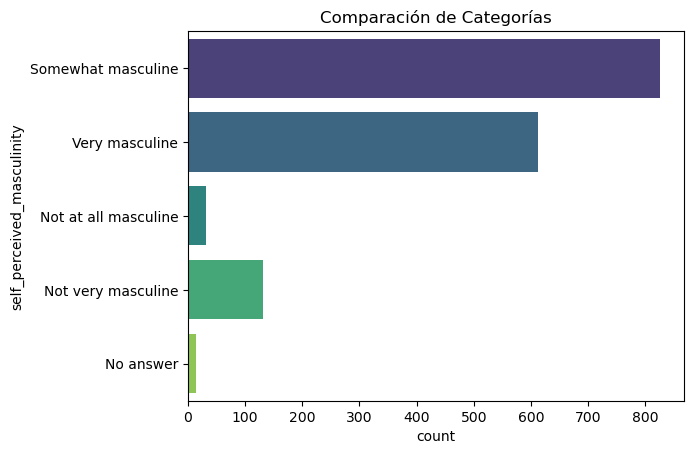

In [16]:
sns.countplot(y= "self_perceived_masculinity", data=df1, palette='viridis')
plt.title("Comparación de Categorías")
plt.show()

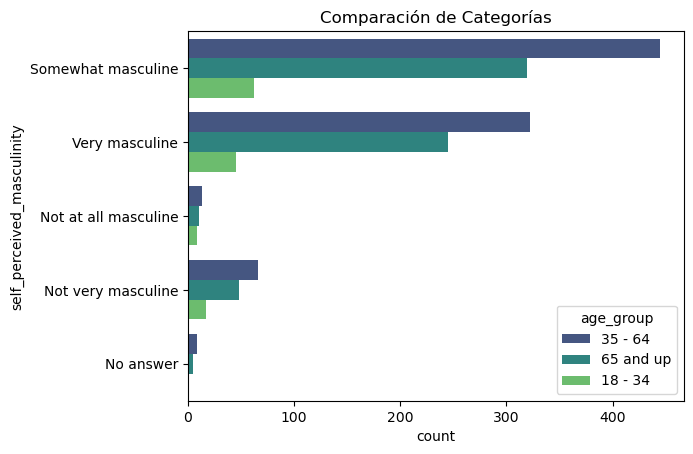

In [28]:
sns.countplot(y= "self_perceived_masculinity", data=df1,hue="age_group", palette='viridis')
plt.title("Comparación de Categorías")
plt.show()

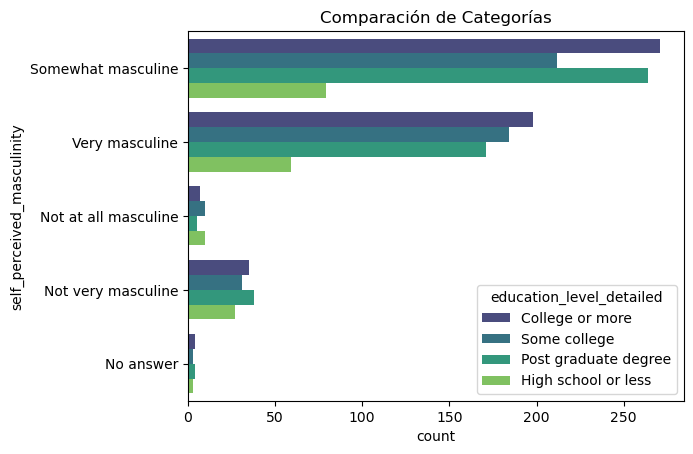

In [29]:
sns.countplot(y= "self_perceived_masculinity", data=df1,hue="education_level_detailed", palette='viridis')
plt.title("Comparación de Categorías")
plt.show()

##### Worries😥

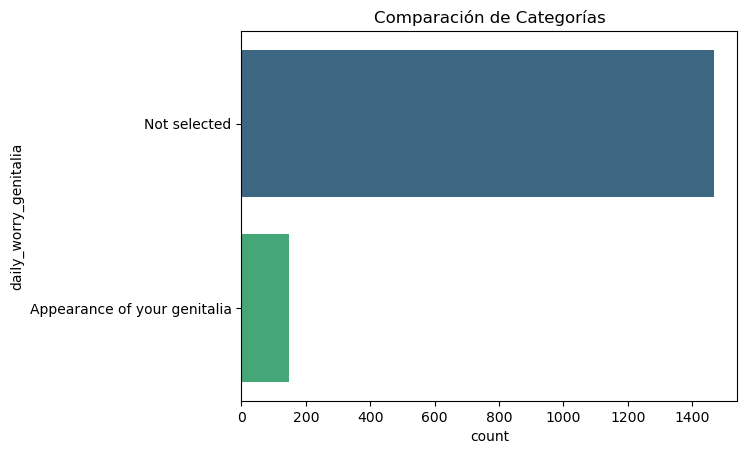

In [32]:
sns.countplot(y="daily_worry_genitalia", data=df1, palette='viridis')
plt.title("Comparación de Categorías")
plt.show()

In [41]:
(df1["daily_worry_hair"]+df1["daily_worry_weight"]).str.replace("Not selected","")

1       Your hair or hairline
2                 Your weight
3                            
4                            
5                 Your weight
                ...          
1611    Your hair or hairline
1612                         
1613              Your weight
1614                         
1615    Your hair or hairline
Length: 1615, dtype: object

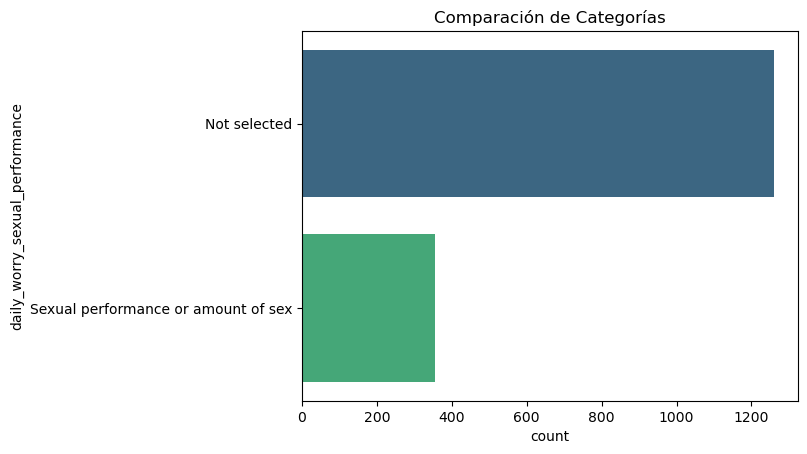

In [34]:
sns.countplot(y="daily_worry_sexual_performance", data=df1, palette='viridis')
plt.title("Comparación de Categorías")
plt.show()